# Import Libraries 

In [23]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

# Load and Audit the Data

In [24]:
!unzip '/content/Medical-Cost-Prediction.zip'

Archive:  /content/Medical-Cost-Prediction.zip
replace test_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test_data.csv           
replace train_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train_data.csv          
replace sample_submission.csv.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: 
error:  invalid response [{ENTER}]
replace sample_submission.csv.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sample_submission.csv.xlsx  


In [25]:
train_df = pd.read_csv("/content/train_data.csv")
test_df = pd.read_csv("/content/test_data.csv")

In [26]:
train_df.head()

,age,sex,bmi,children,smoker,region,id,charges
0,24,male,23.655,0,no,northwest,693,2352.96845
1,28,female,26.510,2,no,southeast,1297,4340.44090
2,51,male,39.700,1,no,southwest,634,9391.34600
3,47,male,36.080,1,yes,southeast,1022,42211.13820
4,46,female,28.900,2,no,southwest,178,8823.27900


In [27]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1003 non-null   int64  
 1   sex       1003 non-null   object 
 2   bmi       1003 non-null   float64
 3   children  1003 non-null   int64  
 4   smoker    1003 non-null   object 
 5   region    1003 non-null   object 
 6   id        1003 non-null   int64  
 7   charges   1003 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 62.8+ KB


In [28]:
train_df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
id          0
charges     0
dtype: int64

In [29]:
train_df.describe()

,age,bmi,children,id,charges
count,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000
mean,39.255234,30.511780,1.104686,666.874377,13267.935817
std,14.039105,6.013107,1.204619,386.570442,12051.356547
min,18.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,26.210000,0.000000,329.500000,4780.839400
50%,39.000000,30.200000,1.000000,675.000000,9447.382400
75%,51.000000,34.430000,2.000000,1001.500000,16840.667970
max,64.000000,53.130000,5.000000,1337.000000,62592.873090


# Uni-Variate Analysis

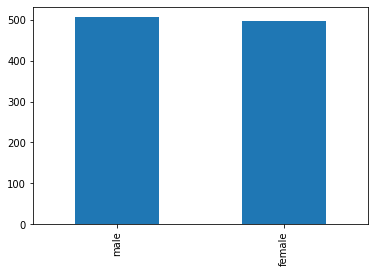

In [30]:
train_df['sex'].value_counts().plot(kind = 'bar')

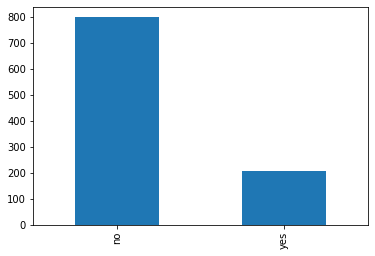

In [31]:
train_df['smoker'].value_counts().plot(kind = 'bar')

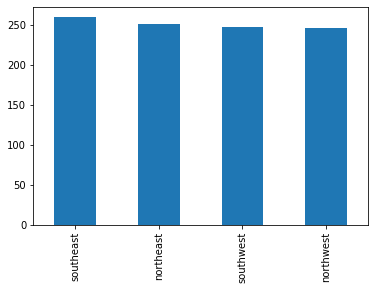

In [32]:
train_df['region'].value_counts().plot(kind = 'bar')

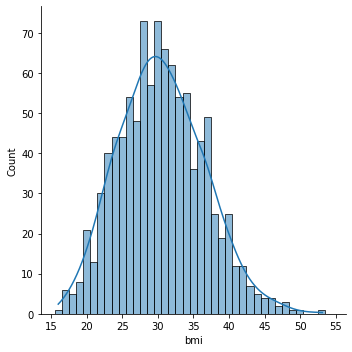

In [33]:
sns.displot(train_df['bmi'], discrete = True, kde = True)


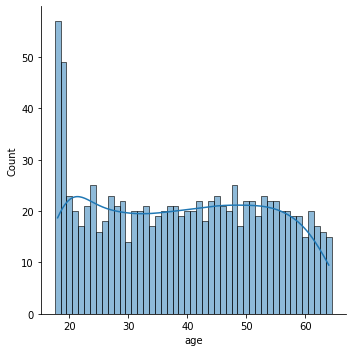

In [34]:
sns.displot(train_df['age'], discrete = True, kde = True)


# Bi-Variate Analysis

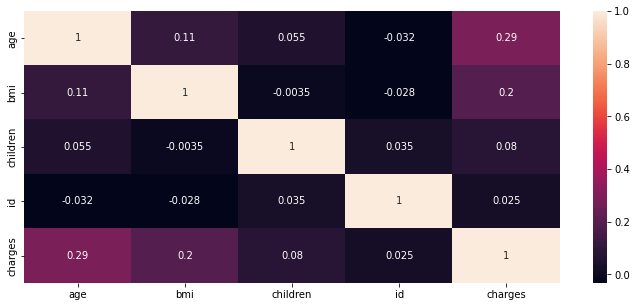

In [35]:
plt.figure(figsize=(12,5))
sns.heatmap(train_df.corr(), annot = True)
plt.show()

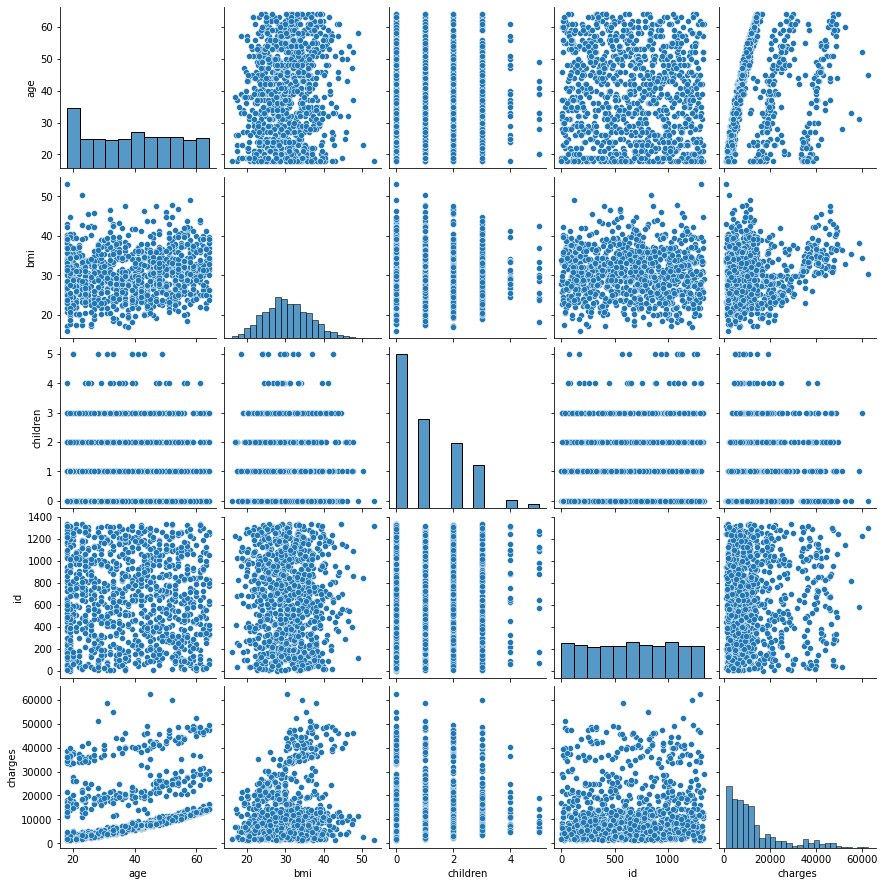

In [36]:
sns.pairplot(train_df)

In [37]:
train_df.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


age         0.036805
bmi         0.289540
children    0.910284
id         -0.021560
charges     1.526521
dtype: float64

# **Label Encoder**

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
le = LabelEncoder()

In [40]:
train_df['smoker'] = le.fit_transform(train_df['smoker'])
train_df['sex'] = le.fit_transform(train_df['sex'])
train_df['region'] = le.fit_transform(train_df['region'])

In [41]:
train_df.head()

,age,sex,bmi,children,smoker,region,id,charges
0,24,1,23.655,0,0,1,693,2352.96845
1,28,0,26.510,2,0,2,1297,4340.44090
2,51,1,39.700,1,0,3,634,9391.34600
3,47,1,36.080,1,1,2,1022,42211.13820
4,46,0,28.900,2,0,3,178,8823.27900


# **Split** the data 

In [42]:
x = train_df.iloc[:,0:7]
y = train_df['charges']

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 123)

# Scaling the data

In [44]:
sc = StandardScaler()

In [45]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Implement LinearRegrassion

In [46]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [60]:
y_hat_train = lr.predict(x_train)

In [48]:
lr.intercept_

13291.580275623443

In [49]:
lr.coef_

array([3747.32242015, -188.61896098, 1935.01640426,  595.03102282,
       9746.73790644, -264.70316386,  238.80291975])

In [50]:
R2_train = metrics.r2_score(y_train, y_hat_train)
R2_train

0.7587650761898803

In [51]:
y_hat_test = lr.predict(x_test)

In [52]:
R2_test = metrics.r2_score(y_test, y_hat_test)
R2_test

0.6780507616777847

In [53]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       335 non-null    int64  
 1   sex       335 non-null    object 
 2   bmi       335 non-null    float64
 3   children  335 non-null    int64  
 4   smoker    335 non-null    object 
 5   region    335 non-null    object 
 6   id        335 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 18.4+ KB


In [54]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       335 non-null    int64  
 1   sex       335 non-null    object 
 2   bmi       335 non-null    float64
 3   children  335 non-null    int64  
 4   smoker    335 non-null    object 
 5   region    335 non-null    object 
 6   id        335 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 18.4+ KB


In [55]:
test_df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
id          0
dtype: int64

In [57]:
test_df['smoker'] = le.fit_transform(test_df['smoker'])
test_df['sex'] = le.fit_transform(test_df['sex'])
test_df['region'] = le.fit_transform(test_df['region'])

In [58]:
charge_pred = lr.predict(test_df)
df = pd.DataFrame(data = charge_pred)
df

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


,0
0,414270.619897
1,417837.866515
2,527159.764517
3,545589.355116
4,217399.801880
...,...
330,373111.225978
331,371463.307902
332,473151.076674
333,272171.533741


In [59]:
submission_df = pd.DataFrame(data = test_df, columns = ["id"])
submission_df["charges"] = df

submission_df.head(20)

,id,charges
0,764,414270.619897
1,887,417837.866515
2,890,527159.764517
3,1293,545589.355116
4,259,217399.801880
5,1312,536634.479591
6,899,342476.722296
7,752,505593.485499
8,1286,458773.596474
9,707,422591.434711


In [62]:
submission_df.to_csv("submission_final.csv", index = False, header = False)